# 03.2 Regression - Polynomial Linear Regression

In [117]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

## Load the Data

In [118]:
df = pd.read_csv("03-regression-data.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [119]:
# will contains the values of the columns 'R&D Spend', 'Administration', 'Marketing Spend', 'State'
X = df.iloc[:, :-1].values
print(f"X {X}")

# take all the rows, take only the last column

# will contains the values of the columns 'Profit'
y = df.iloc[:, -1].values
print(f"y {y}")

X [[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [675

## Pre process the data

In [120]:
my_encoder = OneHotEncoder()
ct = ColumnTransformer(
  transformers=[('encoder', my_encoder, [3])], # <- [3] is list of columns indices to transform
  remainder='passthrough' # <- so we keep all the other columns
)
# must convert to numpy array, just to be sure
X = np.array(ct.fit_transform(X))

## Split the data (train/test)

In [121]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [122]:
print("-" * 50)
print("X_train")
print(X_train)

print("-" * 50)
print("y_train")
print(y_train)

print("-" * 50)
print("X_test")
print(X_test)

print("-" * 50)
print("y_test")
print(y_test)

--------------------------------------------------
X_train
[[0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 0.0 1.0 542.05 51743.15 0.0]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 1.0 94657.16 145077.58 

## Regression

[[-96701.61 103282.38]
 [113260.   144259.4 ]
 [115661.99 146121.95]
 [ 87001.45  77798.83]
 [ -1396.93 191050.39]
 [ 91840.98 105008.31]
 [181044.09  81229.06]
 [103375.16  97483.56]
 [116936.31 110352.25]
 [ -9983.58 166187.94]]
performance score (higher is better) -8.402979412783399


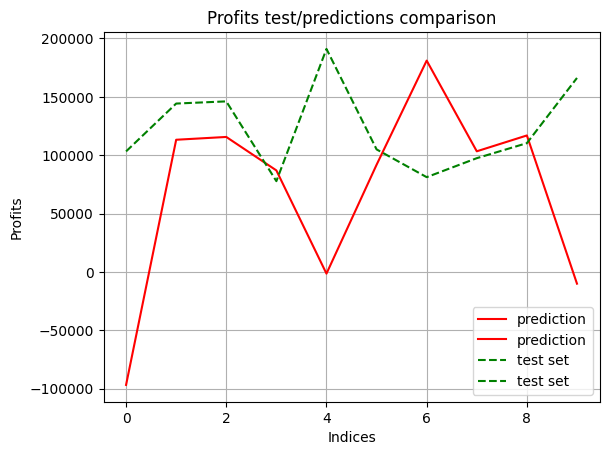

In [135]:
# Training the Polynomial Regression model on the Training set
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)

# regressor.fit(X_poly, y_train)
# y_pred = regressor.predict(poly_reg.transform(X_test))

from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 
# 
# 

regressor = LinearRegression()

# 
# 
# 

regressor.fit(X_poly, y_train)

# 
# 
# 
# 
# 

# Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test))

# print the predicted and the expected values side by side
#  -> for comparison
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(f"performance score (higher is better) {score}")

# 
# 
# 
# 
# 

x_axis = [x for x in range(0, len(y_pred))]

plt.plot(x_axis, y_pred.reshape(len(y_pred), 1), 100, color='red', label='prediction')
plt.plot(x_axis, y_test.reshape(len(y_test), 1), 100, color='green', label='test set', linestyle='dashed')
plt.legend()

plt.xlabel('Indices')
plt.ylabel('Profits')
plt.title('Profits test/predictions comparison')
plt.grid()
plt.show(block=True) # <- force the window to open and stay open

## Regression L1 regularization (Ridge)

/home/barbie/micromamba/envs/planA-lessons/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/barbie/micromamba/envs/planA-lessons/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/barbie/micromamba/envs/planA-lessons/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/barbie/micromamba/envs/planA-lessons/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.39698e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/home/barbie/micromamba/envs/planA-lessons/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: 

best_params: {'alpha': 0.25, 'tol': 0.001}
[[117257.58 103282.38]
 [134875.95 144259.4 ]
 [120114.08 146121.95]
 [ 82055.95  77798.83]
 [ 58246.83 191050.39]
 [152141.9  105008.31]
 [ 86498.36  81229.06]
 [110514.42  97483.56]
 [120759.49 110352.25]
 [ 52065.1  166187.94]]
performance score (higher is better) -1.671543954234235


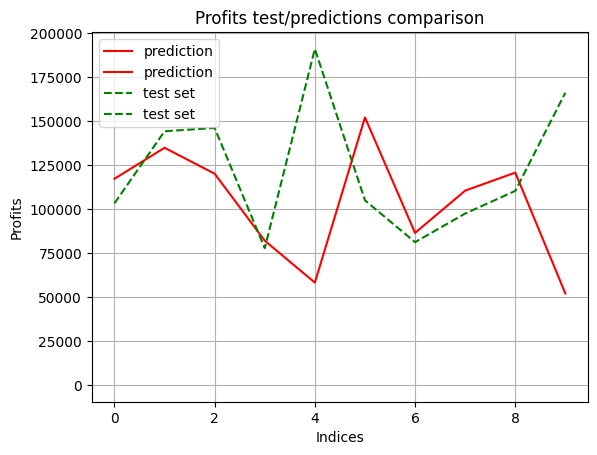

In [136]:
# Training the Polynomial Regression model on the Training set
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)

# regressor.fit(X_poly, y_train)
# y_pred = regressor.predict(poly_reg.transform(X_test))

from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 
# 
# 

# Grid Search version
from sklearn.model_selection import GridSearchCV
best_params = {
  'alpha': np.linspace(0.25, 2.0, num=20).tolist(),
  'tol': np.linspace(0.001, 0.01, num=20).tolist(),
}
regressor = GridSearchCV(
  estimator=Ridge(random_state=0),
  param_grid=best_params,
  cv=5,
  scoring='neg_mean_absolute_error'
)

# 
# 
# 

regressor.fit(X_poly, y_train)

print(f"best_params: {regressor.best_params_}")

# 
# 
# 
# 
# 

# Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test))

# print the predicted and the expected values side by side
#  -> for comparison
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(f"performance score (higher is better) {score}")

# 
# 
# 
# 
# 

x_axis = [x for x in range(0, len(y_pred))]

plt.plot(x_axis, y_pred.reshape(len(y_pred), 1), 100, color='red', label='prediction')
plt.plot(x_axis, y_test.reshape(len(y_test), 1), 100, color='green', label='test set', linestyle='dashed')
plt.legend()

plt.xlabel('Indices')
plt.ylabel('Profits')
plt.title('Profits test/predictions comparison')
plt.grid()
plt.show(block=True) # <- force the window to open and stay open

## Regression L2 regularization (Lasso)

/home/barbie/micromamba/envs/planA-lessons/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.030e+08, tolerance: 6.011e+07
  model = cd_fast.enet_coordinate_descent(
/home/barbie/micromamba/envs/planA-lessons/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.242e+07, tolerance: 5.722e+07
  model = cd_fast.enet_coordinate_descent(
/home/barbie/micromamba/envs/planA-lessons/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

best_params: {'alpha': 2.0, 'tol': 0.01}
[[ 97760.7  103282.38]
 [133653.26 144259.4 ]
 [133268.03 146121.95]
 [ 81728.55  77798.83]
 [182398.86 191050.39]
 [118078.4  105008.31]
 [ 64973.74  81229.06]
 [101925.53  97483.56]
 [114714.68 110352.25]
 [171215.09 166187.94]]
performance score (higher is better) 0.92981493842309


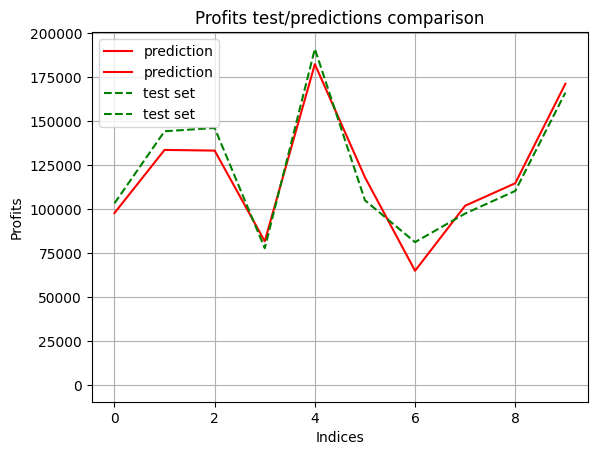

In [137]:
# Training the Polynomial Regression model on the Training set
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)

# regressor.fit(X_poly, y_train)
# y_pred = regressor.predict(poly_reg.transform(X_test))

from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 
# 
# 

# Grid Search version
from sklearn.model_selection import GridSearchCV
best_params = {
  'alpha': np.linspace(0.25, 2.0, num=20).tolist(),
  'tol': np.linspace(0.001, 0.01, num=20).tolist(),
}
regressor = GridSearchCV(
  estimator=Lasso(random_state=0),
  param_grid=best_params,
  cv=5,
  scoring='neg_mean_absolute_error'
)

# 
# 
# 

regressor.fit(X_poly, y_train)

print(f"best_params: {regressor.best_params_}")

# 
# 
# 
# 
# 

# Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test))

# print the predicted and the expected values side by side
#  -> for comparison
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(f"performance score (higher is better) {score}")

# 
# 
# 
# 
# 

x_axis = [x for x in range(0, len(y_pred))]

plt.plot(x_axis, y_pred.reshape(len(y_pred), 1), 100, color='red', label='prediction')
plt.plot(x_axis, y_test.reshape(len(y_test), 1), 100, color='green', label='test set', linestyle='dashed')
plt.legend()

plt.xlabel('Indices')
plt.ylabel('Profits')
plt.title('Profits test/predictions comparison')
plt.grid()
plt.show(block=True) # <- force the window to open and stay open